In [38]:
#mutation counter
import math
import pandas as pd
import numpy as np
import sys
import csv
from functools import reduce
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

Myc_List = ['Myc_TA39_927','Myc_TA41_1938','Myc_WT13_842','Myc_WT13_864','Myc_WT13_1356','Myc_WT13_1445','Myc_WT13_1576','Myc_WT21_222','Myc_WT21_1066','Neu_1357','Neu_1894','Neu_2187','PyMT_302','PyMT_3136','PyMT_3304']
#Myc_List = ['TA39_927']


for base in Myc_List:
    df = pd.read_excel("All_"+base+"_SNV.xlsx")
    c_to_a = max(df[((df["ref"] == "C") & (df["var"] == "A")) | ((df["ref"] == "G") & (df["var"] == "T"))].count().to_list())
    c_to_g = max(df[((df["ref"] == "C") & (df["var"] == "G")) | ((df["ref"] == "G") & (df["var"] == "C"))].count().to_list())
    c_to_t = max(df[((df["ref"] == "C") & (df["var"] == "T")) | ((df["ref"] == "G") & (df["var"] == "A"))].count().to_list())
    t_to_a = max(df[((df["ref"] == "T") & (df["var"] == "A")) | ((df["ref"] == "A") & (df["var"] == "T"))].count().to_list())
    t_to_c = max(df[((df["ref"] == "T") & (df["var"] == "C")) | ((df["ref"] == "A") & (df["var"] == "G"))].count().to_list())
    t_to_g = max(df[((df["ref"] == "T") & (df["var"] == "G")) | ((df["ref"] == "A") & (df["var"] == "C"))].count().to_list())
    total = c_to_a + c_to_g + c_to_t + t_to_a + t_to_c + t_to_g
    C_to_A = str(c_to_a)
    C_to_G = str(c_to_g)
    C_to_T = str(c_to_t)
    T_to_A = str(t_to_a)
    T_to_C = str(t_to_c)
    T_to_G = str(t_to_g)
    Total = str(total)

    file = open(base+"_Mutational_Burden.txt", "w")
    file.write("C to A = "+C_to_A+"\n"+"C to G = "+C_to_G+"\n"+"C to T = "+C_to_T+"\n"\
              +"T to A = "+T_to_A+"\n"+"T to C = "+T_to_C+"\n"+"T to G = "+T_to_G+"\n"\
              +"Total = "+Total)
    file.close()

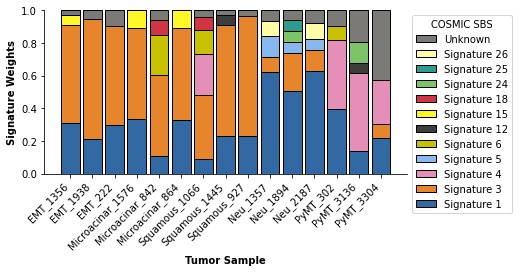

In [40]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches

fig, ax = plt.rcParams["figure.figsize"] = (6.5,3)
 
# y-axis in bold
#rc('font', weight='bold')


df = pd.read_csv("Mutation_Signatures.csv", sep=',')
# Values of each group
signature1 = [0.310027253,0.209688077,0.299868682,0.336430128,0.104439907,0.329073782,0.090141925,0.228328513,0.232653326,0.62285435,0.505915582,0.631369463,0.396849794,0.138797518,0.215854967]
signature3 = [0.600842041,0.739325833,0.606734239,0.553241879,0.501347269,0.563950381,0.390836352,0.680781794,0.736252058,0.09132696,0.231097241,0.123560821,0,0,0.087119296]
signature4 = [0,0,0,0,0,0,0.254499169,0,0,0,0,0,0.419611456,0.478891807,0.272675091]
signature5 = [0,0,0,0,0,0,0,0,0,0.129063447,0.068276283,0.067328222,0,0,0]
signature6 = [0,0,0,0,0.244973764,0,0.147234086,0,0,0,0,0,0.086771738,0,0]
signature12 = [0,0,0,0,0,0,0,0.063825775,0,0,0,0,0,0.060591222,0]
signature15 = [0.062290289,0,0,0.110327967,0,0.106975811,0,0,0,0,0,0,0,0,0]
signature18 = [0,0,0,0,0.089262637,0,0.078039477,0,0,0,0,0,0,0,0]
signature24 = [0,0,0,0,0,0,0,0,0,0,0.065993623,0,0,0.128580164,0]
signature25 = [0,0,0,0,0,0,0,0,0,0,0.071361893,0,0,0,0]
signature26 = [0,0,0,0,0,0,0,0,0,0.089175635,0,0.098934708,0,0,0]
Unknown = [0.026840416,0.05098609,0.093397079,2.68668E-08,0.059976423,2.59076E-08,0.03924899,0.027063919,0.031094616,0.067579608,0.057355378,0.078806786,0.096767011,0.193139288,0.424350646]

# Heights of bars1 + bars2
bars1 = np.add(signature1, signature3).tolist()
bars2 = np.add(bars1, signature4).tolist()
bars3 = np.add(bars2, signature5).tolist()
bars4 = np.add(bars3, signature6).tolist()
bars5 = np.add(bars4, signature12).tolist()
bars6 = np.add(bars5, signature15).tolist()
bars7 = np.add(bars6, signature18).tolist()
bars8 = np.add(bars7, signature24).tolist()
bars9 = np.add(bars8, signature25).tolist()
bars10 = np.add(bars9, signature26).tolist()

 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
 
# Names of group and bar width
names = ['EMT_1356',
'EMT_1938',
'EMT_222',
'Microacinar_1576',
'Microacinar_842',
'Microacinar_864',
'Squamous_1066',
'Squamous_1445',
'Squamous_927',
'Neu_1357',
'Neu_1894',
'Neu_2187',
'PyMT_302',
'PyMT_3136',
'PyMT_3304']

barWidth = 0.85
 
# Create brown bars
plt.bar(r, signature1, color='#3369A2', edgecolor='black', width=barWidth, label="Signature 1")
# Create green bars (middle), on top of the first ones
plt.bar(r, signature3, bottom=signature1, color='#E6852B', tick_label='1', edgecolor='black', width=barWidth, label="Signature 3")
# Create green bars (top)
plt.bar(r, signature4, bottom=bars1, color='#E48EB8', edgecolor='black', width=barWidth, label="Signature 4")
plt.bar(r, signature5, bottom=bars2, color='#87B9EE', edgecolor='black', width=barWidth, label="Signature 5")
plt.bar(r, signature6, bottom=bars3, color='#C7C100', edgecolor='black', width=barWidth, label="Signature 6")
plt.bar(r, signature12, bottom=bars4, color='#3D3E3C', edgecolor='black', width=barWidth, label="Signature 12")
plt.bar(r, signature15, bottom=bars5, color='#FFF827', edgecolor='black', width=barWidth, label="Signature 15")
plt.bar(r, signature18, bottom=bars6, color='#D13444', edgecolor='black', width=barWidth, label="Signature 18")
plt.bar(r, signature24, bottom=bars7, color='#7DC469', edgecolor='black', width=barWidth, label="Signature 24")
plt.bar(r, signature25, bottom=bars8, color='#2A9D8F', edgecolor='black', width=barWidth, label="Signature 25")
plt.bar(r, signature26, bottom=bars9, color='#FFFCA6', edgecolor='black', width=barWidth, label="Signature 26")
plt.bar(r, Unknown, bottom=bars10, color='#7B7A76', edgecolor='black', width=barWidth, label="Unknown")
 
# Custom X axis
plt.xticks(r, names, rotation=45, ha="right", fontweight='normal')
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontweight='normal')
plt.xlabel("Tumor Sample", fontweight='bold')
plt.ylabel("Signature Weights", fontweight='bold')

#ax = plt.gca()
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], title='COSMIC SBS', loc='upper left', bbox_to_anchor=(1,1), ncol=1)

#plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, title="COSMIC SBS")
#plt.title("COSMIC SBS Mutation Signatures of Mouse Tumors")
#plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, title="Etiology", labels=["Aging","HRR Deficient","Tobacco Smoking","Aging","MMR Deficient","Unknown","MMR Deficient","ROS","Aflatoxin","Chemotherapy","MMR Deficient","Unknown"])


#labels_reverse = ["Aging","HRR Deficient","Tobacco Smoking","Aging","MMR Deficient","Unknown","MMR Deficient","ROS","Aflatoxin","Chemotherapy","MMR Deficient","Unknown"]
#colors = ['#3369A2','#E6852B','#E48EB8','#87B9EE','#C7C100','#3D3E3C','#FFF827','#D13444','#7DC469','#2A9D8F','#FFFCA6','#7B7A76']
#patches = mpatches.Patch(color=colors, label=labels_reverse)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='COSMIC SBS', loc='upper left', bbox_to_anchor=(1,1), ncol=1)
#patches = mpatches.Patch(color=colors, label=labels_reverse)

# Show graphic
#plt.show()
sns.despine()
plt.savefig("Myc_Mutation_Signatures.svg", dpi=1200)

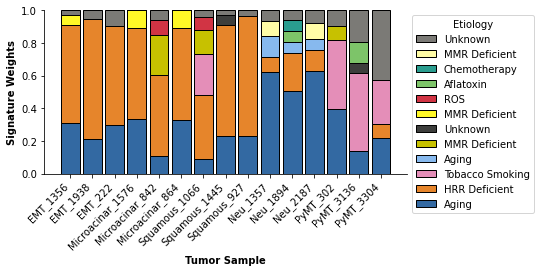

In [41]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches

fig, ax = plt.rcParams["figure.figsize"] = (6.5,3)
 
# y-axis in bold
#rc('font', weight='bold')


df = pd.read_csv("Mutation_Signatures.csv", sep=',')
# Values of each group
signature1 = [0.310027253,0.209688077,0.299868682,0.336430128,0.104439907,0.329073782,0.090141925,0.228328513,0.232653326,0.62285435,0.505915582,0.631369463,0.396849794,0.138797518,0.215854967]
signature3 = [0.600842041,0.739325833,0.606734239,0.553241879,0.501347269,0.563950381,0.390836352,0.680781794,0.736252058,0.09132696,0.231097241,0.123560821,0,0,0.087119296]
signature4 = [0,0,0,0,0,0,0.254499169,0,0,0,0,0,0.419611456,0.478891807,0.272675091]
signature5 = [0,0,0,0,0,0,0,0,0,0.129063447,0.068276283,0.067328222,0,0,0]
signature6 = [0,0,0,0,0.244973764,0,0.147234086,0,0,0,0,0,0.086771738,0,0]
signature12 = [0,0,0,0,0,0,0,0.063825775,0,0,0,0,0,0.060591222,0]
signature15 = [0.062290289,0,0,0.110327967,0,0.106975811,0,0,0,0,0,0,0,0,0]
signature18 = [0,0,0,0,0.089262637,0,0.078039477,0,0,0,0,0,0,0,0]
signature24 = [0,0,0,0,0,0,0,0,0,0,0.065993623,0,0,0.128580164,0]
signature25 = [0,0,0,0,0,0,0,0,0,0,0.071361893,0,0,0,0]
signature26 = [0,0,0,0,0,0,0,0,0,0.089175635,0,0.098934708,0,0,0]
Unknown = [0.026840416,0.05098609,0.093397079,2.68668E-08,0.059976423,2.59076E-08,0.03924899,0.027063919,0.031094616,0.067579608,0.057355378,0.078806786,0.096767011,0.193139288,0.424350646]

# Heights of bars1 + bars2
bars1 = np.add(signature1, signature3).tolist()
bars2 = np.add(bars1, signature4).tolist()
bars3 = np.add(bars2, signature5).tolist()
bars4 = np.add(bars3, signature6).tolist()
bars5 = np.add(bars4, signature12).tolist()
bars6 = np.add(bars5, signature15).tolist()
bars7 = np.add(bars6, signature18).tolist()
bars8 = np.add(bars7, signature24).tolist()
bars9 = np.add(bars8, signature25).tolist()
bars10 = np.add(bars9, signature26).tolist()

 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
 
# Names of group and bar width
names = ['EMT_1356',
'EMT_1938',
'EMT_222',
'Microacinar_1576',
'Microacinar_842',
'Microacinar_864',
'Squamous_1066',
'Squamous_1445',
'Squamous_927',
'Neu_1357',
'Neu_1894',
'Neu_2187',
'PyMT_302',
'PyMT_3136',
'PyMT_3304']

barWidth = 0.85
 
# Create brown bars
plt.bar(r, signature1, color='#3369A2', edgecolor='black', width=barWidth, label="Aging")
# Create green bars (middle), on top of the first ones
plt.bar(r, signature3, bottom=signature1, color='#E6852B', tick_label='1', edgecolor='black', width=barWidth, label="HRR Deficient")
# Create green bars (top)
plt.bar(r, signature4, bottom=bars1, color='#E48EB8', edgecolor='black', width=barWidth, label="Tobacco Smoking")
plt.bar(r, signature5, bottom=bars2, color='#87B9EE', edgecolor='black', width=barWidth, label="Aging")
plt.bar(r, signature6, bottom=bars3, color='#C7C100', edgecolor='black', width=barWidth, label="MMR Deficient")
plt.bar(r, signature12, bottom=bars4, color='#3D3E3C', edgecolor='black', width=barWidth, label="Unknown")
plt.bar(r, signature15, bottom=bars5, color='#FFF827', edgecolor='black', width=barWidth, label="MMR Deficient")
plt.bar(r, signature18, bottom=bars6, color='#D13444', edgecolor='black', width=barWidth, label="ROS")
plt.bar(r, signature24, bottom=bars7, color='#7DC469', edgecolor='black', width=barWidth, label="Aflatoxin")
plt.bar(r, signature25, bottom=bars8, color='#2A9D8F', edgecolor='black', width=barWidth, label="Chemotherapy")
plt.bar(r, signature26, bottom=bars9, color='#FFFCA6', edgecolor='black', width=barWidth, label="MMR Deficient")
plt.bar(r, Unknown, bottom=bars10, color='#7B7A76', edgecolor='black', width=barWidth, label="Unknown")
 
# Custom X axis
plt.xticks(r, names, rotation=45, ha="right", fontweight='normal')
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontweight='normal')
plt.xlabel("Tumor Sample", fontweight='bold')
plt.ylabel("Signature Weights", fontweight='bold')

#ax = plt.gca()
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[::-1], labels[::-1], title='COSMIC SBS', loc='upper left', bbox_to_anchor=(1,1), ncol=1)

#plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, title="COSMIC SBS")
#plt.title("COSMIC SBS Mutation Signatures of Mouse Tumors")
#plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, title="Etiology", labels=["Aging","HRR Deficient","Tobacco Smoking","Aging","MMR Deficient","Unknown","MMR Deficient","ROS","Aflatoxin","Chemotherapy","MMR Deficient","Unknown"])


#labels_reverse = ["Aging","HRR Deficient","Tobacco Smoking","Aging","MMR Deficient","Unknown","MMR Deficient","ROS","Aflatoxin","Chemotherapy","MMR Deficient","Unknown"]
#colors = ['#3369A2','#E6852B','#E48EB8','#87B9EE','#C7C100','#3D3E3C','#FFF827','#D13444','#7DC469','#2A9D8F','#FFFCA6','#7B7A76']
#patches = mpatches.Patch(color=colors, label=labels_reverse)

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Etiology', loc='upper left', bbox_to_anchor=(1,1), ncol=1)
#patches = mpatches.Patch(color=colors, label=labels_reverse)

# Show graphic
#plt.show()
sns.despine()
plt.savefig("Myc_Mutation_Signatures.svg", dpi=1200)

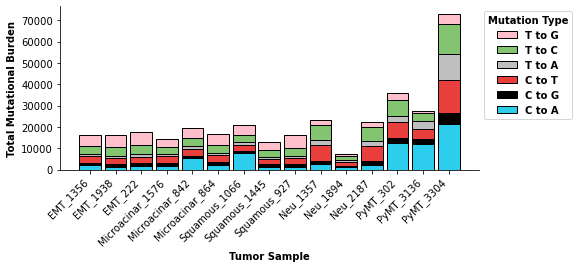

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import figure
import pandas as pd
import seaborn as sns

plt.rcParams["figure.figsize"] = (7.5,3)
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = [1880,1297,1613,1741,5222,1986,7530,1274,1383,2460,1130,2318,12630,12184,21554]
bars2 = [1206,1381,1323,1306,1300,1301,1253,1193,1320,1742,618,1567,2305,2134,5136]
bars3 = [3076,2726,3092,3070,3133,3312,2878,2550,2680,7412,1912,7098,7303,4797,15262]
bars4 = [1203,1108,1315,1099,1316,1291,1192,984,1041,2300,915,2187,2818,3654,12181]
bars5 = [3660,3875,4102,3329,3572,3654,3290,3163,3777,6862,1606,6532,7469,3689,13916]
bars6 = [5159,5669,5914,3890,4962,5144,4504,3909,5944,2671,1094,2441,3122,1135,4775]
 
# Heights of bars1 + bars2
bars12 = np.add(bars1, bars2).tolist()
bars13 = np.add(bars12, bars3).tolist()
bars14 = np.add(bars13, bars4).tolist()
bars15 = np.add(bars14, bars5).tolist()

 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
 
# Names of group and bar width
names = ['EMT_1356','EMT_1938','EMT_222','Microacinar_1576','Microacinar_842','Microacinar_864','Squamous_1066','Squamous_1445','Squamous_927','Neu_1357','Neu_1894','Neu_2187','PyMT_302','PyMT_3136','PyMT_3304']
barWidth = 0.85

plt.bar(r, bars1, color='#2dcded', edgecolor='black', width=barWidth, label='C to A')
plt.bar(r, bars2, bottom=bars1, color='black', edgecolor='black', width=barWidth, label='C to G')
plt.bar(r, bars3, bottom=bars12, color='#e83f3c', edgecolor='black', width=barWidth, label='C to T')
plt.bar(r, bars4, bottom=bars13, color='#bfbfbf', edgecolor='black', width=barWidth, label='T to A')
plt.bar(r, bars5, bottom=bars14, color='#82c470', edgecolor='black', width=barWidth, label='T to C')
plt.bar(r, bars6, bottom=bars15, color='pink', edgecolor='black', width=barWidth, label='T to G')
 
# Custom X axis
plt.xticks(r, names, rotation=45, ha="right", fontweight="normal")
plt.yticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000], fontweight="normal")
plt.xlabel("Tumor Sample", fontweight='bold')
plt.ylabel("Total Mutational Burden", fontweight='bold')
#plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, title="Mutation Type")
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Mutation Type', loc='upper left', bbox_to_anchor=(1,1), ncol=1)
#plt.title("Type and Amount of Single Base Pair Substitution")
 
# Show graphic
#plt.show()
sns.despine()
plt.savefig("Myc_Mutational_Burden.svg", dpi=1200)

<Figure size 540x216 with 0 Axes>

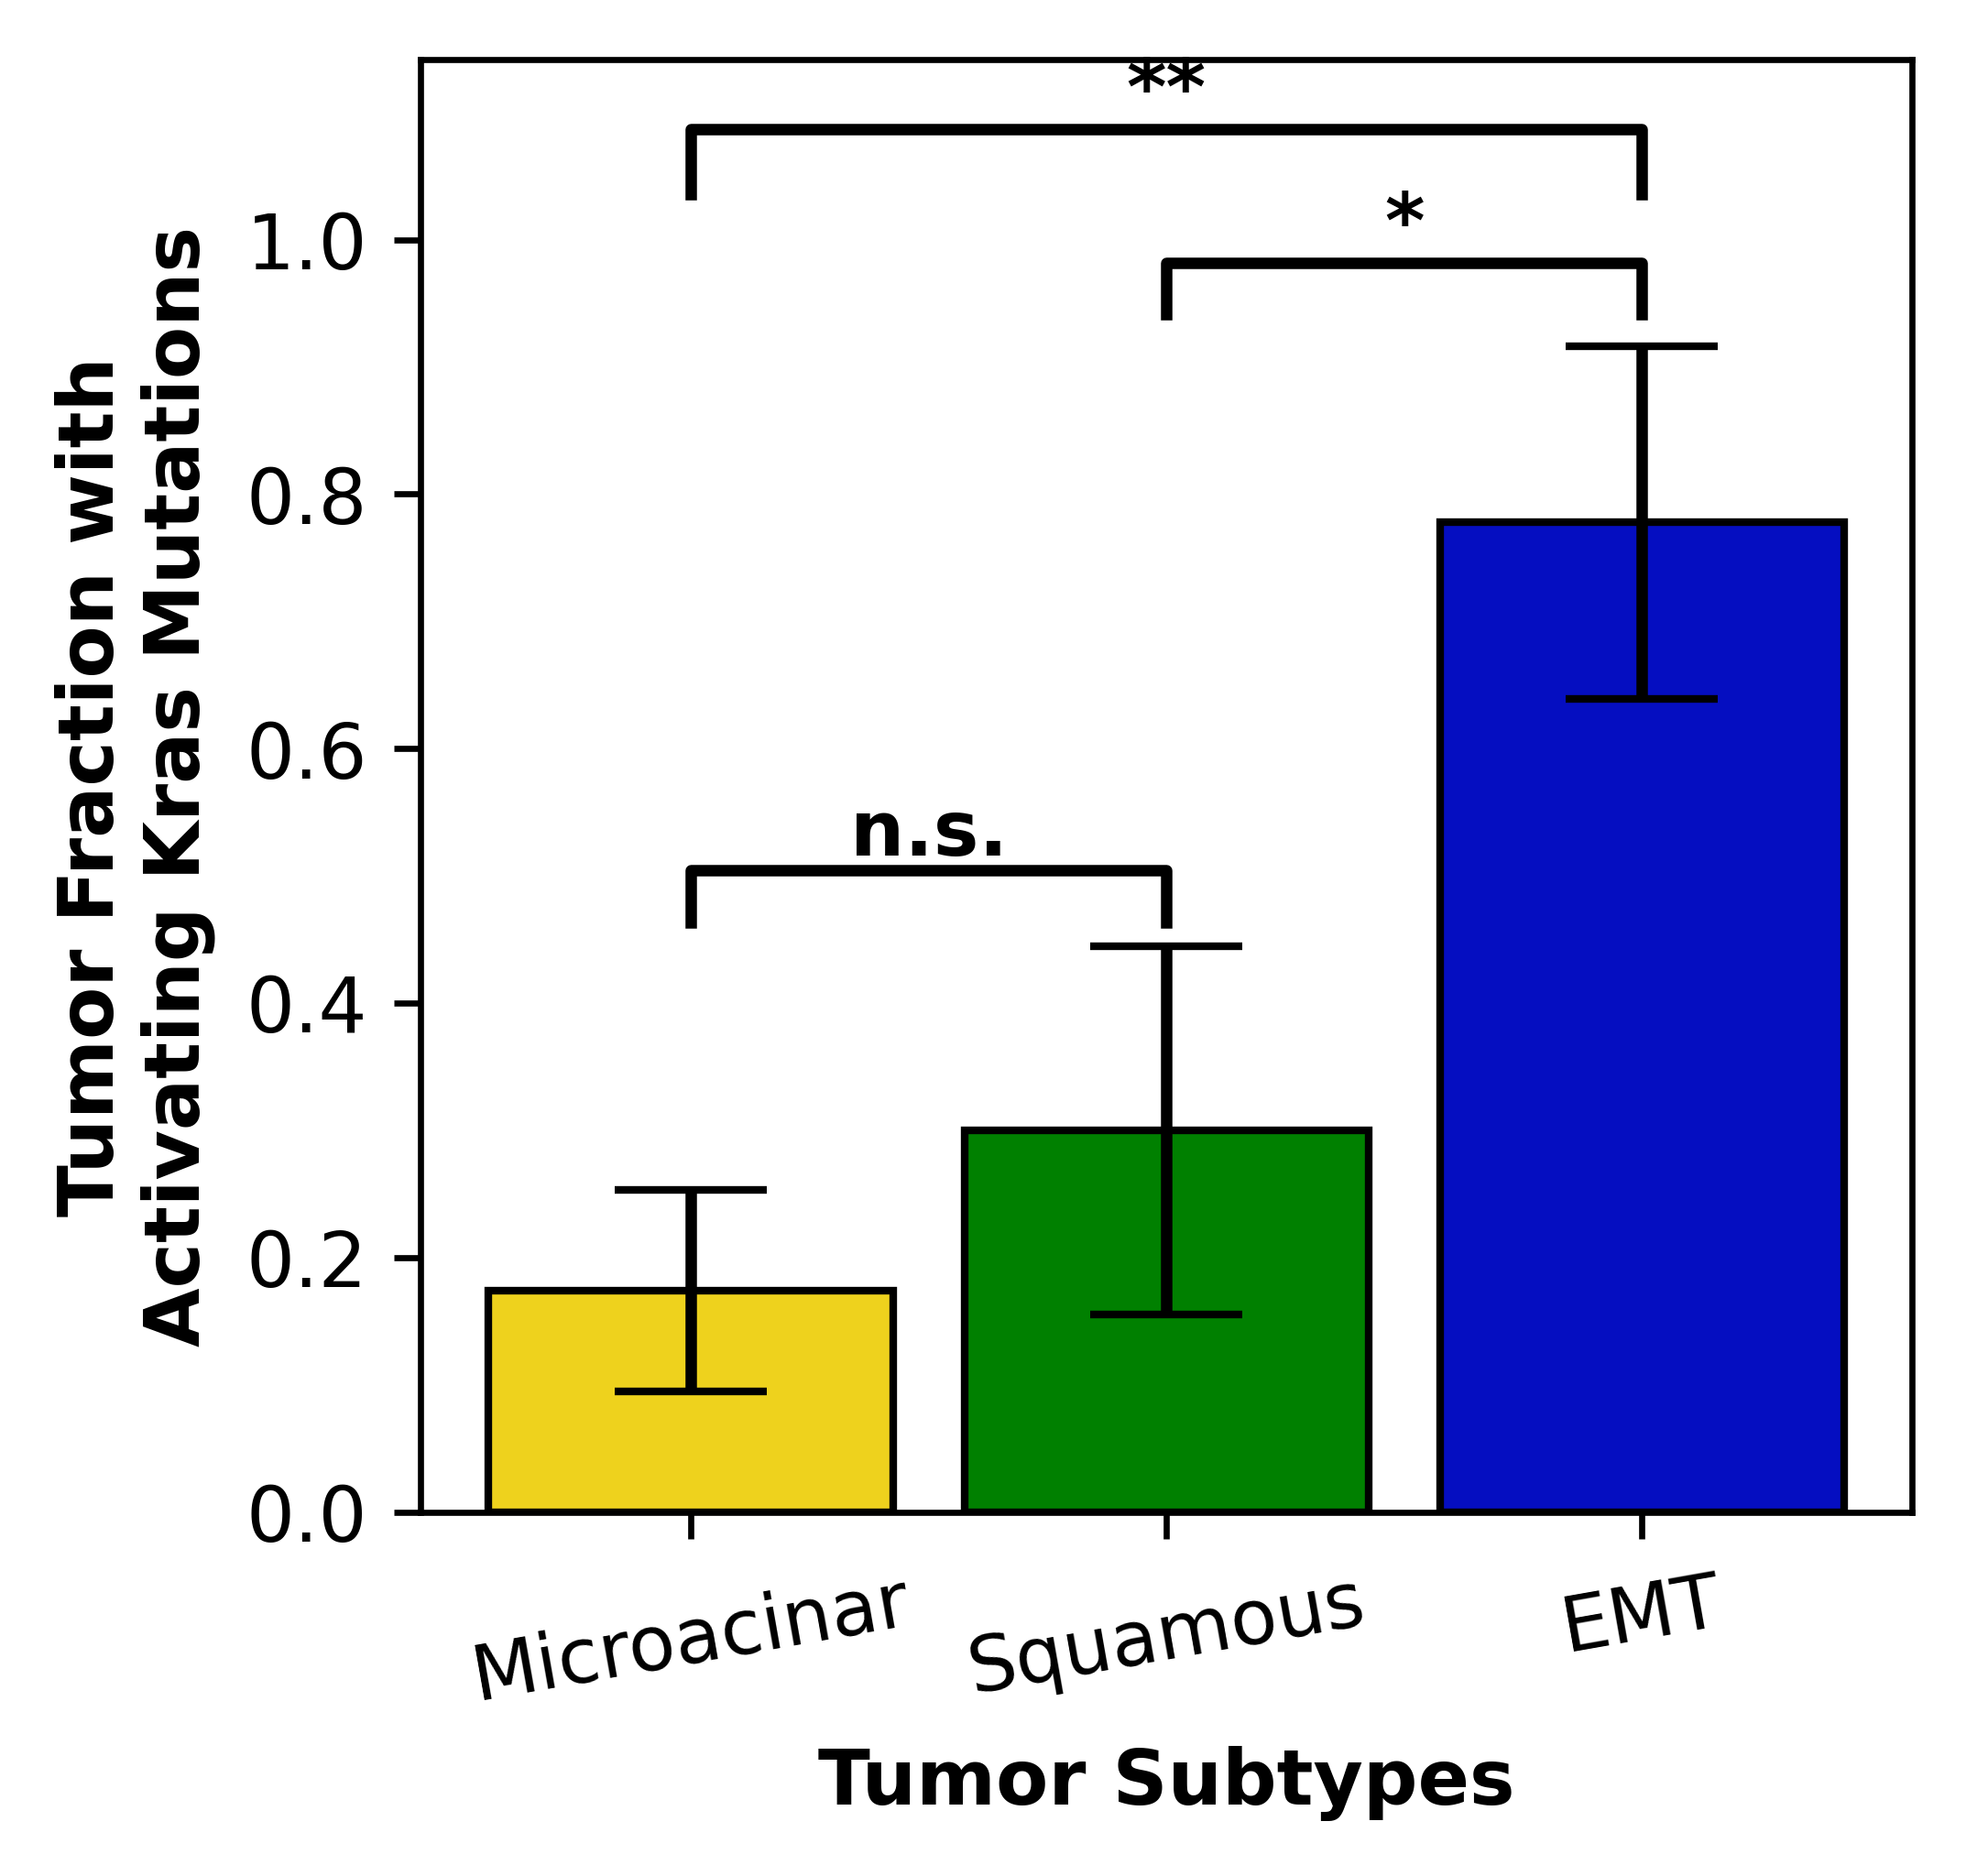

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

def barplot_annotate_brackets(num1, num2, data, center, height, yerr=None, dh=.05, barh=.05, fs=None, maxasterix=None):
    """ 
    Annotate barplot with p-values.

    :param num1: number of left bar to put bracket over
    :param num2: number of right bar to put bracket over
    :param data: string to write or number for generating asterixes
    :param center: centers of all bars (like plt.bar() input)
    :param height: heights of all bars (like plt.bar() input)
    :param yerr: yerrs of all bars (like plt.bar() input)
    :param dh: height offset over bar / bar + yerr in axes coordinates (0 to 1)
    :param barh: bar height in axes coordinates (0 to 1)
    :param fs: font size
    :param maxasterix: maximum number of asterixes to write (for very small p-values)
    """

    if type(data) is str:
        text = data
    else:
        # * is p < 0.05
        # ** is p < 0.005
        # *** is p < 0.0005
        # etc.
        text = ''
        p = .05

        while data < p:
            text += '*'
            p /= 10.

            if maxasterix and len(text) == maxasterix:
                break

        if len(text) == 0:
            text = 'n. s.'

    lx, ly = center[num1], height[num1]
    rx, ry = center[num2], height[num2]

    if yerr:
        ly += yerr[num1]
        ry += yerr[num2]

    ax_y0, ax_y1 = plt.gca().get_ylim()
    dh *= (ax_y1 - ax_y0)
    barh *= (ax_y1 - ax_y0)

    y = max(ly, ry) + dh

    barx = [lx, lx, rx, rx]
    bary = [y, y+barh, y+barh, y]
    mid = ((lx+rx)/2, y+barh)

    plt.plot(barx, bary, c='black')

    kwargs = dict(ha='center', va='bottom')
    if fs is not None:
        kwargs['fontsize'] = fs

    plt.text(*mid, text, **kwargs)


r = [0,1,2]
 
# Names of group and bar width
heights = [0.1739, 0.3, 0.7778]
yerr_sem = [0.0790, 0.1449, 0.1386]
bars = np.arange(len(heights))
barWidth = 0.85


names = ['Microacinar','Squamous','EMT']
colors = ['#EED21D','Green','#050EC1']

plt.figure()
figure(figsize=(3.5,3.5), dpi=600)
plt.bar(r, heights, align='center', color=colors, edgecolor="black", width=barWidth)
#plt.ylim(0, 1)

barplot_annotate_brackets(0, 1, "n.s.", bars, heights, dh=0.2)
#actual p-value: 0.3989
barplot_annotate_brackets(1, 2, "*", bars, heights, dh=0.2)
#actual p-value: 0.0364
barplot_annotate_brackets(0, 2, '**', bars, heights, dh=0.25)
#actual p-value: 0.0011


plt.xticks(r, names, rotation=10, fontweight='normal')
plt.yticks([0,.2,.4,.6,.8,1], fontweight='normal')
plt.xlabel("Tumor Subtypes", fontweight='bold')
plt.ylabel("Tumor Fraction with\nActivating Kras Mutations", fontweight='bold')
plt.errorbar(names, heights, yerr=yerr_sem, fmt="none", ecolor="black", capsize=10)
#plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
#plt.title("Fraction of Tumors with Activating KRAS Mutations")

#plt.show()
plt.savefig("KRAS_Mutation_Fraction.svg", dpi=1200)

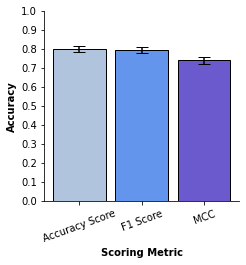

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import figure
import pandas as pd
import seaborn as sns

r = [0,1,2]
 
# Names of group and bar width
heights = [0.800352113,0.796597737,0.739908571]
bars = np.arange(len(heights))
barWidth = 0.85
# yerr is for standard deviation
yerrs = [0.014469095,0.015738734,0.019428871]

names = ['Accuracy Score','F1 Score','MCC']
colors = ['lightsteelblue','cornflowerblue','slateblue']

plt.figure(figsize=[3.5,3.5])

#figure(figsize=(3.5,3.5), dpi=1200)
plt.bar(r, heights, align='center', color=colors, edgecolor="black", width=barWidth, yerr=yerrs, capsize=6, label='bar')

plt.xticks(r, names, rotation=20, fontweight='normal')
plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1], fontweight='normal')
plt.xlabel("Scoring Metric", fontweight='bold')
plt.ylabel("Accuracy", fontweight='bold')
sns.despine()


plt.savefig("Machine_Learning_Accuracy_Scores_Metabric.svg", dpi=1200)

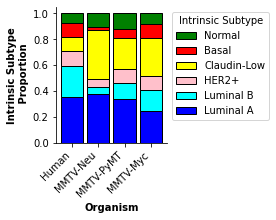

In [2]:
# Human Vs Mouse Models PAM50 Subtype Proportions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches

fig, ax = plt.rcParams["figure.figsize"] = (2,2.5)
 

# Values of each group
LumA =         [0.3546,
                0.375424533,
                0.333466774,
                0.244993297]
LumB =         [0.2406,
                0.053038772,
                0.12873114,
                0.15806888]
Her2 =         [0.1135,
                0.062313399,
                0.107952853,
                0.10911744]
Claudin_low =  [0.1104,
                0.382006896,
                0.237757149,
                0.299245398]
Basal =        [0.1059,
                0.0206372,
                0.068127872,
                0.106600839]
Normal =       [0.075,
                0.106579201,
                0.123964212,
                0.081974146]


# Heights of bars1 + bars2
bars1 = np.add(LumA, LumB).tolist()
bars2 = np.add(bars1, Her2).tolist()
bars3 = np.add(bars2, Claudin_low).tolist()
bars4 = np.add(bars3, Basal).tolist()
bars5 = np.add(bars4, Normal).tolist()


 
# The position of the bars on the x-axis
r = [0,1,2,3]
 
# Names of group and bar width
names = ['Human','MMTV-Neu','MMTV-PyMT','MMTV-Myc']

barWidth = 0.85
 
# Create brown bars
plt.bar(r, LumA, color='blue', edgecolor='black', width=barWidth, label="Luminal A")
# Create green bars (middle), on top of the first ones
plt.bar(r, LumB, bottom=LumA, color='cyan', edgecolor='black', width=barWidth, label="Luminal B")
# Create green bars (top)
plt.bar(r, Her2, bottom=bars1, color='pink', edgecolor='black', width=barWidth, label="HER2+")
plt.bar(r, Claudin_low, bottom=bars2, color='yellow', edgecolor='black', width=barWidth, label="Claudin-Low")
plt.bar(r, Basal, bottom=bars3, color='red', edgecolor='black', width=barWidth, label="Basal")
plt.bar(r, Normal, bottom=bars4, color='green', edgecolor='black', width=barWidth, label="Normal")

 
# Custom X axis
plt.xticks(r, names, rotation=45, ha="right", fontweight='normal')
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontweight='normal')
plt.xlabel("Organism", fontweight='bold')
plt.ylabel("Intrinsic Subtype\n Proportion", fontweight='bold')


ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Intrinsic Subtype', loc='upper left', bbox_to_anchor=(1,1), ncol=1)
#patches = mpatches.Patch(color=colors, label=labels_reverse)

# Show graphic
#plt.show()
sns.despine()
plt.savefig("Mouse_Model_to_Human_Subtype.svg", dpi=1200)

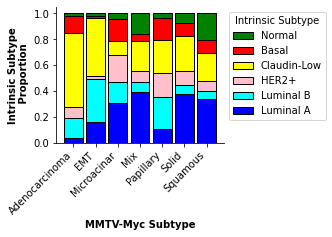

In [5]:
# Myc Histological Subtype to Human Subtype Proportion
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
import matplotlib.patches as mpatches

fig, ax = plt.rcParams["figure.figsize"] = (3,2.5)
 

# Values of each group
LumA =         [0.036017987,
                0.160116046,
                0.305319018,
                0.394682937,
                0.107981744,
                0.377588732,
                0.333246614]
LumB =         [0.153958149,
                0.332789227,
                0.164400332,
                0.076734974,
                0.244878412,
                0.068967546,
                0.064753524]
Her2 =         [0.081907538,
                0.025393812,
                0.205662905,
                0.078701808,
                0.187158961,
                0.109080631,
                0.075916421]
Claudin_low =  [0.571279552,
                0.442104218,
                0.108067884,
                0.23364491,
                0.250124627,
                0.2685913,
                0.220905291]
Basal =        [0.135033068,
                0.016634444,
                0.170668742,
                0.055064943,
                0.172241211,
                0.098294879,
                0.098268583]
Normal =       [0.021803707,
                0.022962253,
                0.045881115,
                0.161170426,
                0.037615044,
                0.077476911,
                0.206909567]


# Heights of bars1 + bars2
bars1 = np.add(LumA, LumB).tolist()
bars2 = np.add(bars1, Her2).tolist()
bars3 = np.add(bars2, Claudin_low).tolist()
bars4 = np.add(bars3, Basal).tolist()
bars5 = np.add(bars4, Normal).tolist()


 
# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6]
 
# Names of group and bar width
names = ['Adenocarcinoma','EMT','Microacinar','Mix','Papillary','Solid','Squamous']

barWidth = 0.85
 
# Create brown bars
plt.bar(r, LumA, color='blue', edgecolor='black', width=barWidth, label="Luminal A")
# Create green bars (middle), on top of the first ones
plt.bar(r, LumB, bottom=LumA, color='cyan', edgecolor='black', width=barWidth, label="Luminal B")
# Create green bars (top)
plt.bar(r, Her2, bottom=bars1, color='pink', edgecolor='black', width=barWidth, label="HER2+")
plt.bar(r, Claudin_low, bottom=bars2, color='yellow', edgecolor='black', width=barWidth, label="Claudin-Low")
plt.bar(r, Basal, bottom=bars3, color='red', edgecolor='black', width=barWidth, label="Basal")
plt.bar(r, Normal, bottom=bars4, color='green', edgecolor='black', width=barWidth, label="Normal")

 
# Custom X axis
plt.xticks(r, names, rotation=45, ha="right", fontweight='normal')
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], fontweight='normal')
plt.xlabel("MMTV-Myc Subtype", fontweight='bold')
plt.ylabel("Intrinsic Subtype\n Proportion", fontweight='bold')


ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='Intrinsic Subtype', loc='upper left', bbox_to_anchor=(1,1), ncol=1)
#patches = mpatches.Patch(color=colors, label=labels_reverse)

# Show graphic
#plt.show()
sns.despine()
plt.savefig("MMTV_Myc_Subtypes_to_Human.svg", dpi=1200)